# Titanic Project

## Objective

The objective of the project is to analyze the Titanic Dataset and provide insights into various demographic and survival patterns among passengers.

The project aims to provide a comprehensive understanding of the Titanic dataset's demographics, survival rates, ticket distribution, and embarkation locations, along with identifying correlations between relevant variables.

### The following team  Members worked on this project:
- Ehijie Collins Agbagu
- Adesegun Adeboye
- Kolawole Abdulquadri
- Sodiq Muritala
- Hassan Mustapha
- Ayomide Oluwole

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.isna() # this checks for Nan values across each column in the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isna().sum() # get the total nan values of each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# get medium for the age variable 
median_age=data['Age'].median()
median_age

28.0

In [8]:
# fill nan values
data['Age'].fillna(median_age, inplace=True)

In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# get median for the age variable
mode_cabin = data['Cabin'].mode()
mode_cabin = mode_cabin[2]
mode_cabin

'G6'

In [11]:
data['Cabin'].fillna(mode_cabin, inplace=True)

In [12]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [60]:
data.shape

(891, 12)

In [13]:
# Asignment 
# Perform unianalysis & a Bivariate analysis 
# Perform a correlation plot between the variables to identify
# their relationships
# Identify the relevant features from your insights

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# unianalysis

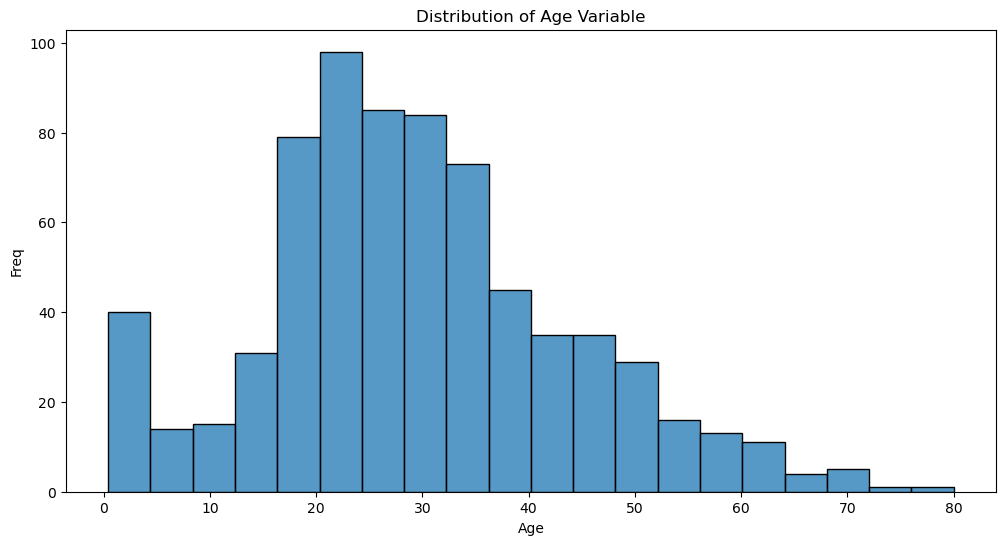

In [9]:
# Determining Age distributions in the Titanic
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=20)
plt.title("Distribution of Age Variable")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

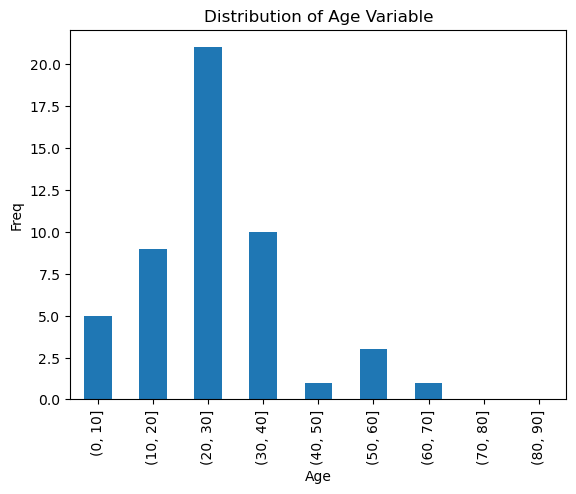

In [78]:
# grouping age 
bins = [0,10,20,30,40,50,60,70,80,90]
age_groups = pd.cut(data['Age'][:50], bins=bins)
age_group_counts = age_groups.value_counts().sort_index()

age_group_counts.plot(kind='bar')
plt.title("Distribution of Age Variable")
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

In [ ]:
# According the graph the population consist of more young adult between 18 to 40. 

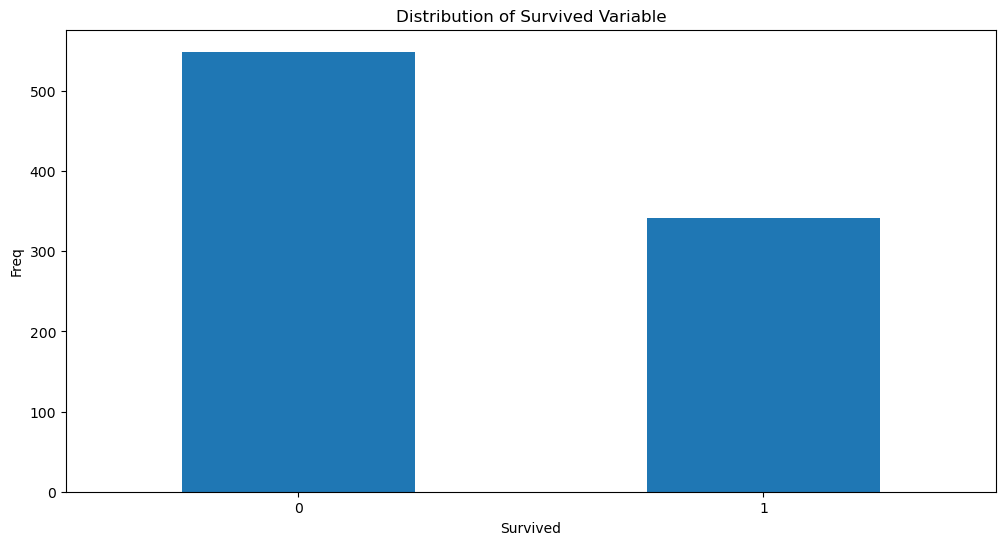

In [23]:
#Determining the number of Survived and unsurvived passengers. 

plt.figure(figsize=(12, 6))
data['Survived'].value_counts().plot(kind='bar')
plt.title("Distribution of Survived Variable")
plt.xlabel("Survived")
plt.ylabel("Freq")
plt.xticks(rotation=0)
plt.show()

In [5]:
survived_counts = data['Survived'].value_counts()
total_observation = survived_counts.sum()
survived_percentages = round((survived_counts/total_observation) * 100, 1)
print(survived_percentages)

0    61.6
1    38.4
Name: Survived, dtype: float64


In [75]:
m = male_survived_count = data[(data['Survived'] == 1)& (data['Sex']=="male")].shape[0]
f = female_survived_count = data[(data['Survived'] == 1)& (data['Sex']=="female")].shape[0]

print("Number of male survivors: ", m)
print("Number of female survivors: ",f)

Number of male survivors:  109
Number of female survivors:  233


In [23]:
# the percentage that survived was 38%, while 62% died 

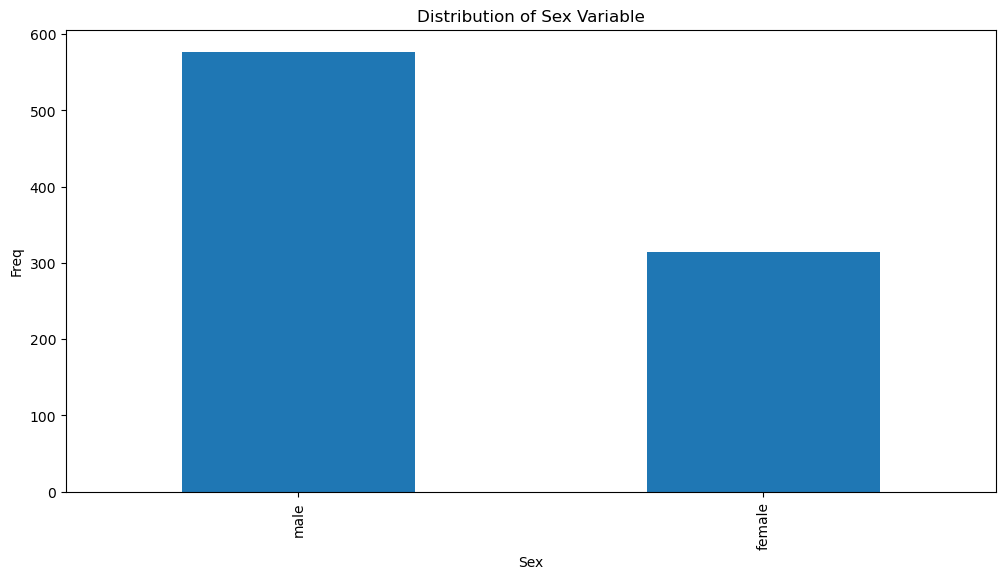

In [26]:
#Determining the number of male and female passengers. 

plt.figure(figsize=(12, 6))
data['Sex'].value_counts().plot(kind='bar')
plt.title("Distribution of Sex Variable")
plt.xlabel("Sex")
plt.ylabel("Freq")
plt.show()


In [27]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

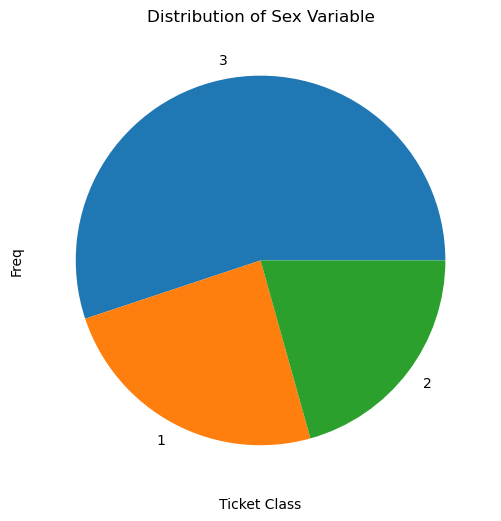

In [29]:
plt.figure(figsize=(12, 6))
data['Pclass'].value_counts().plot(kind='pie')
plt.title("Distribution of Sex Variable")
plt.xlabel("Ticket Class")
plt.ylabel("Freq")
plt.show()

In [30]:
# The passengers booked more for the third class tickets

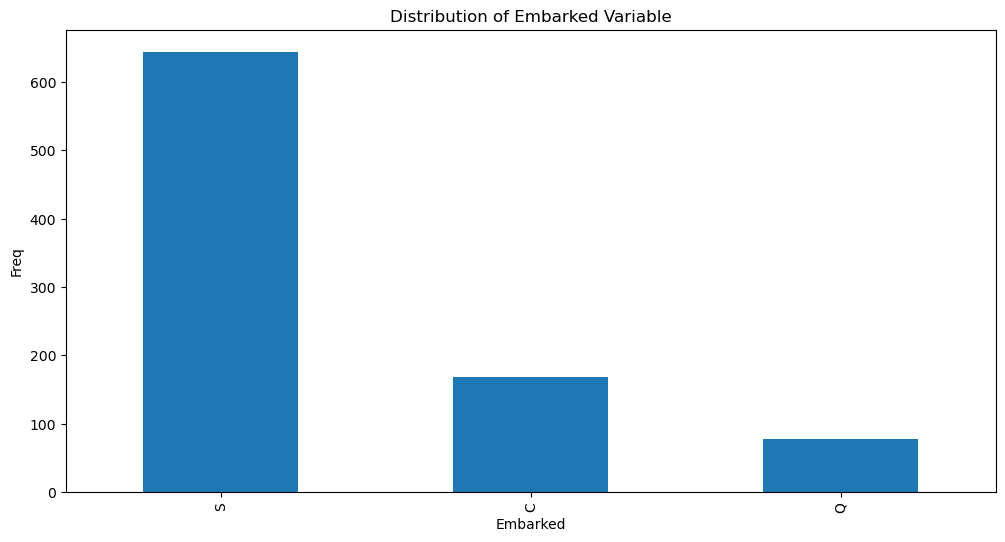

In [32]:
plt.figure(figsize=(12, 6))
data['Embarked'].value_counts().plot(kind='bar')
plt.title("Distribution of Embarked Variable")
plt.xlabel("Embarked")
plt.ylabel("Freq")
plt.show()

In [33]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
# The analysis shows that 72% of the total passengers embarked from Southampton,
# 19% from Cherbourg and 9% from Queens Town
embarked_counts = data['Embarked'].value_counts()
total_observation = embarked_counts.sum()
embarked_percentages = round((embarked_counts/total_observation) * 100, 1)
print(embarked_percentages)

S    72.4
C    18.9
Q     8.7
Name: Embarked, dtype: float64


G6             691
C23 C25 C27      4
B96 B98          4
F2               3
E101             3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64

### Bivariate Analysis


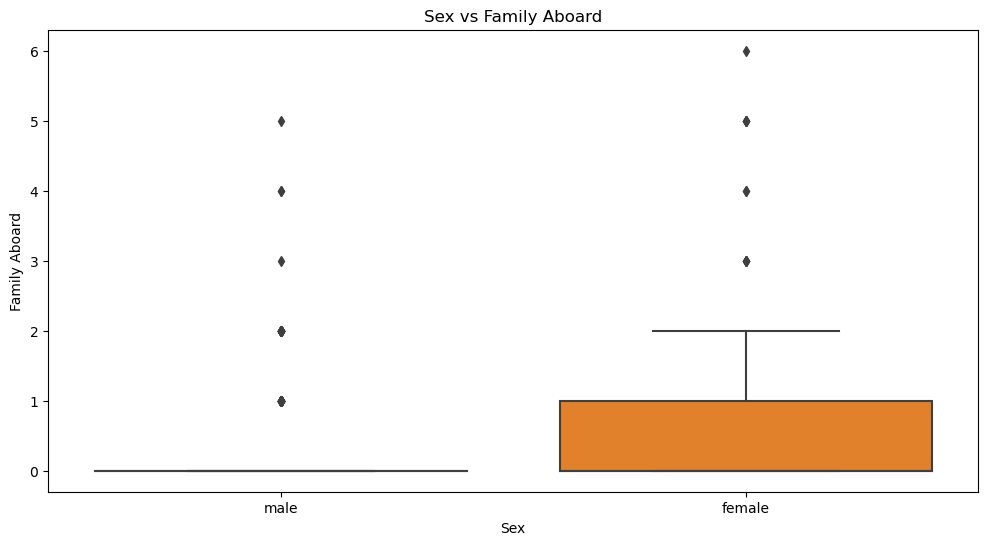

In [39]:
# The Sex that aboard with their family
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Parch', data = data)
plt.title("Sex vs Family Aboard")
plt.xlabel("Sex")
plt.ylabel("Family Aboard")
plt.show()

In [40]:
# This graph shows that more females brought their families unlike the male gender who came alone. 

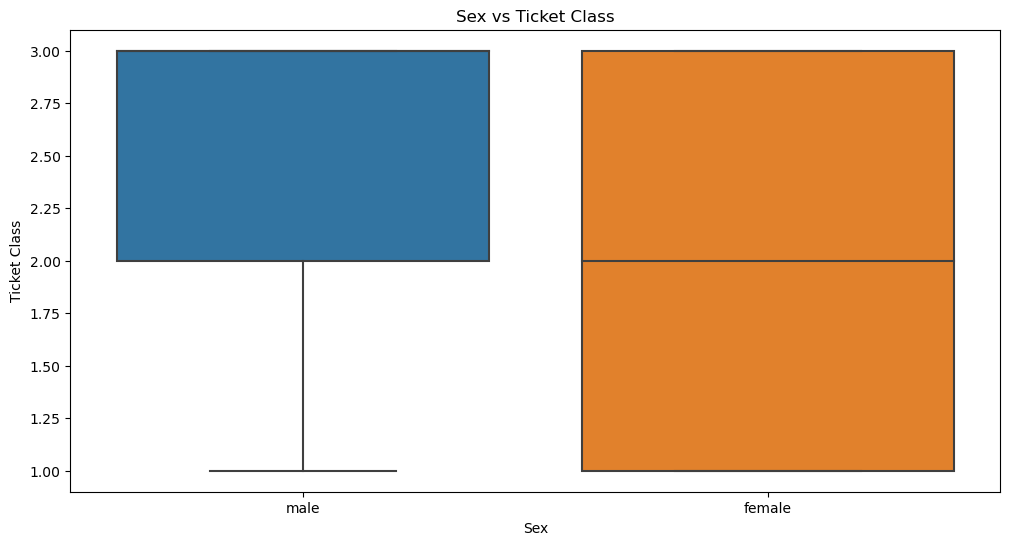

In [41]:
# The Sex that aboard according to the Ticket Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Pclass', data = data)
plt.title("Sex vs Ticket Class")
plt.xlabel("Sex")
plt.ylabel("Ticket Class")
plt.show()

In [42]:
# The graph shows that first class consists majorly of females

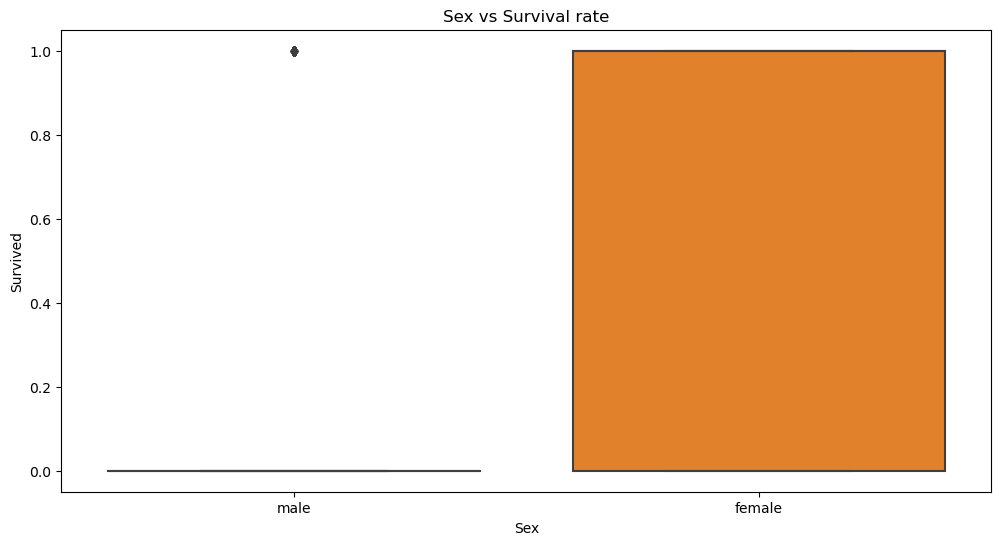

In [43]:
# The Sex that aboard according to the Ticket Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Survived', data = data)
plt.title("Sex vs Survival rate")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

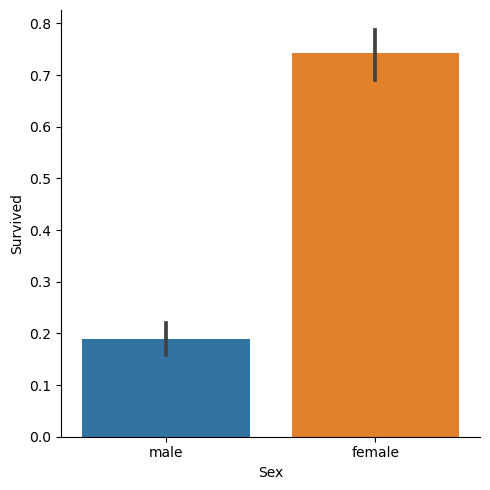

In [63]:
g = sns.catplot(data=data,x="Sex", y="Survived", kind="bar")

In [46]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [76]:
corr_matrix_pclass = data[['Survived', 'Pclass','Age','SibSp','Parch','Fare']].corr()
corr_matrix_pclass

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


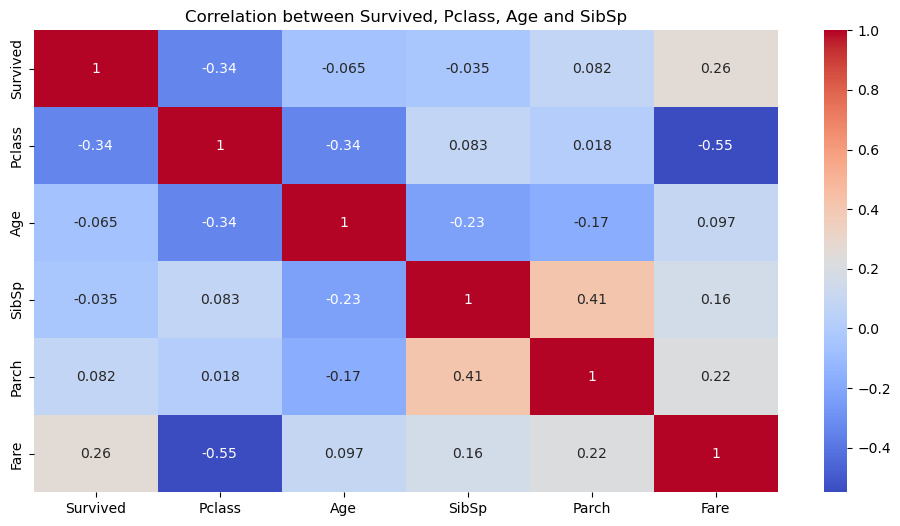

In [77]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_pclass,annot = True, cmap="coolwarm")
plt.title("Correlation between Survived, Pclass, Age and SibSp")
plt.show()

In [ ]:
# The summary of the analysis carried out on Titanic Dataset:
- Age range of the majority ranged from 20 to 30 with total population of 891 passengers,
- The titanic cruise was male dominated with the male total count as 577 and the female total count as 314,
- 61.6% of the total population did not survive the titanic crash,
- 38.4% of the total population did survive the titanic crash,
- Number of male survivors:  109,
- Number of female survivors:  233,
- The third class tickets sold the most among the three categories.
- Passengers embarked the ship majorly from Southampton with the value of 72.4%
- Highest correlation with the numeric values present was between SibSp and Parch column with 0.41
